# Mejoramiento Espacial - Filtros<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Efectos en la Imagen usando Convolución con Filtros y Kernel



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

Los valores de un píxel en la imagen resultante se calculan multiplicando cada valor de kernel por los valores de píxel de la imagen de entrada correspondiente. Este proceso se itera hasta que el kernel haya completado la iteración de esta multiplicación en la totalidad de la imagen de entrada. Esto se representa visualmente a continuación:

<img src='operations.png'>

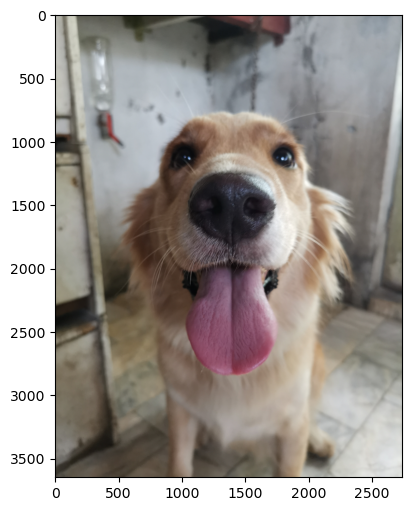

In [3]:
my_dog = imread('pb_doggo.jpg')
plt.figure(figsize=(6,6))
plt.imshow(my_dog, cmap='gray');

Para asegurarnos de que los efectos de los filtros y kernels sean visualmente evidentes, redimensionemos la imagen al 10% de su tamaño original.

In [4]:
r_scaled = rescale(my_dog[:,:,0], 0.10)
g_scaled = rescale(my_dog[:,:,1], 0.10)
b_scaled = rescale(my_dog[:,:,2], 0.10)
my_dog_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)
my_dog_gray = rescale(rgb2gray(my_dog), 0.10) 

También hemos definido una función que aplicará la función de convolución en todos los canales de la imagen, como se muestra a continuación:

In [5]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

Ahora, intentemos aplicar el filtro de identidad en la imagen del perro.

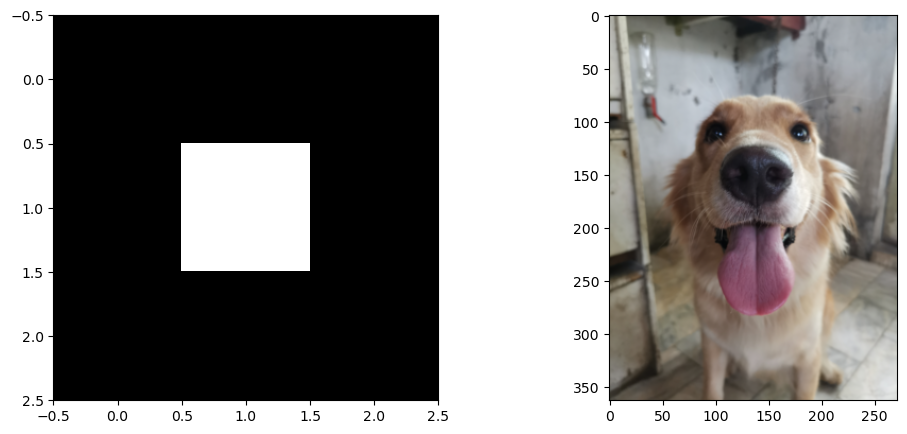

In [6]:
identity = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])

conv_im1 = rgb_convolve2d(my_dog_scaled, identity)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(identity, cmap='gray')
ax[1].imshow(abs(conv_im1), cmap='gray');

Como era de esperar, ¡no pasa nada! Como sugiere el nombre del filtro, el kernel de identidad devolverá la imagen de entrada en sí.

Ahora, probemos los filtros de detección de bordes en la imagen en escala de grises del perro.

In [7]:
# Edge Detection -1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])

# Edge Detection -2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])


# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])


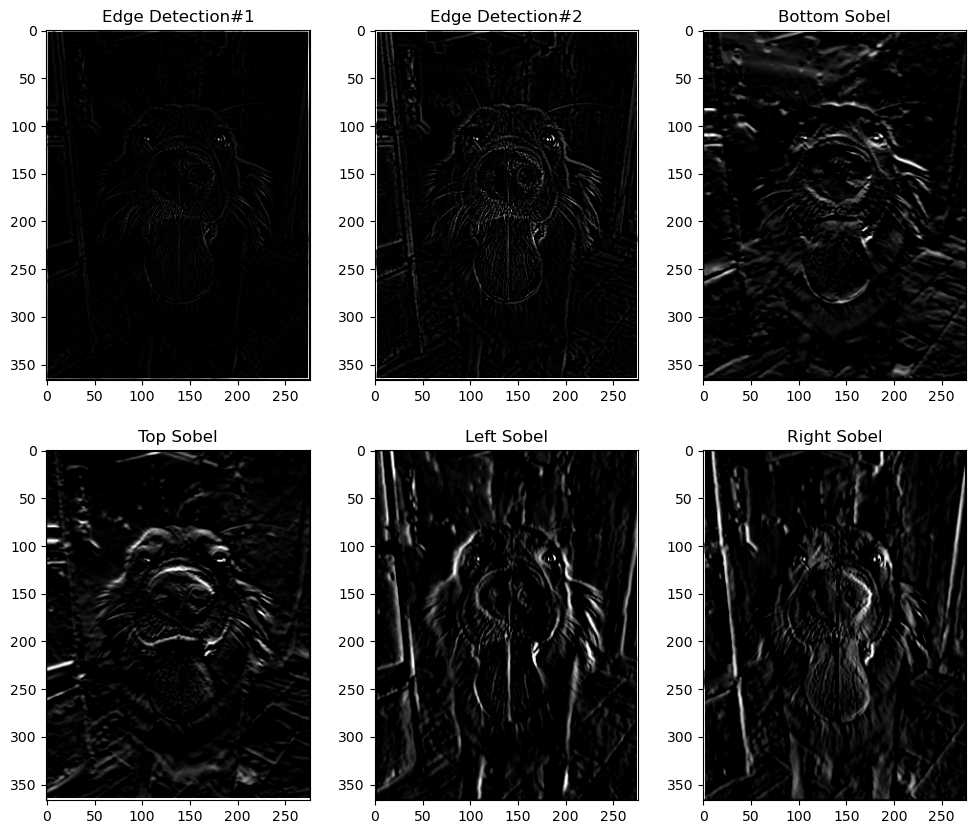

In [8]:
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]
kernel_name = ['Edge Detection#1', 'Edge Detection#2', 'Bottom Sobel', 
               'Top Sobel', 'Left Sobel', 'Right Sobel']
figure, axis = plt.subplots(2,3, figsize=(12,10))

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
    conv_im1 = convolve2d(my_dog_gray, kernel[::-1, ::-1]).clip(0,1)
    ax.imshow(abs(conv_im1), cmap='gray')
    ax.set_title(name)

In [9]:
# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])


# Box Blur
kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])

# Gaussian Blur 3x3
kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])


# Gaussian Blur 5x5
kernel11 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])

# Unsharp masking 5x5
kernel12 = -(1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, -476, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])


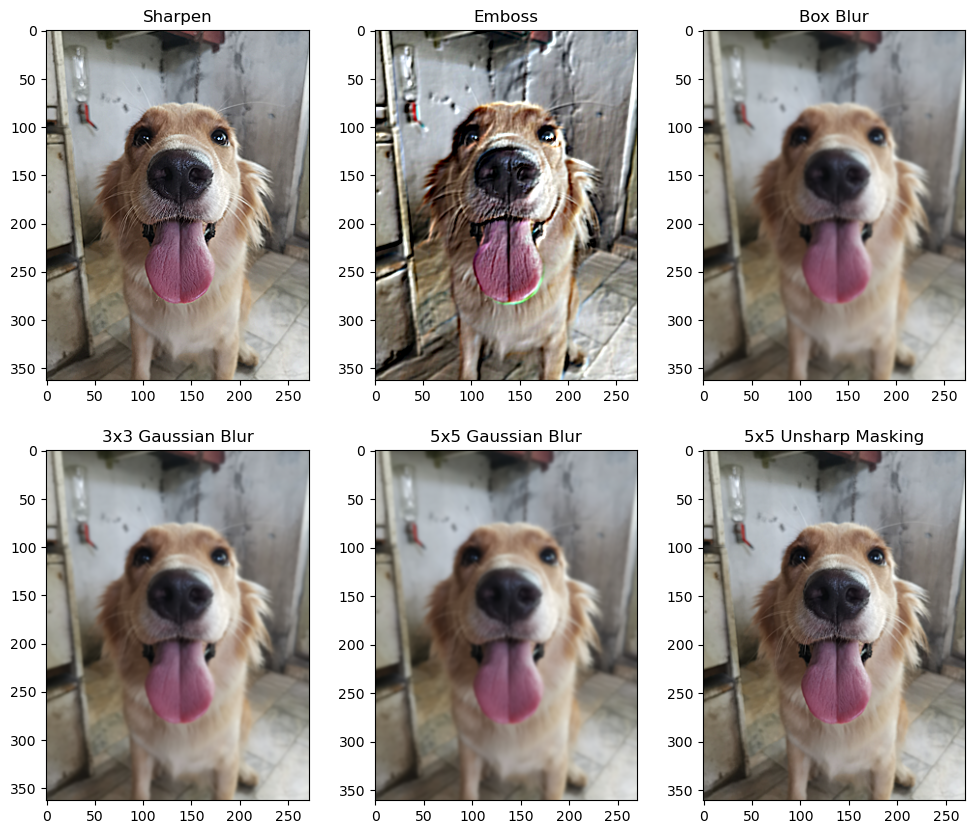

In [10]:
kernels = [kernel7, kernel8, kernel9, kernel10, kernel11, kernel12]
kernel_name = ['Sharpen', 'Emboss', 'Box Blur', '3x3 Gaussian Blur', 
               '5x5 Gaussian Blur', '5x5 Unsharp Masking']
figure, axis = plt.subplots(2,3, figsize=(12,10))

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
    conv_im1 = rgb_convolve2d(my_dog_scaled, kernel[::-1, ::-1]).clip(0,1)
    ax.imshow(abs(conv_im1), cmap='gray')
    ax.set_title(name)

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).